In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import torch.nn.functional as F

if torch.cuda.is_available():
    import torch.backends.cudnn as cudnn
from torch import autograd
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image

import matplotlib.pyplot as plt

import imageio
from PIL import Image

In [3]:
def norm(vector):
    #input for 3D would be [b x 3] or [3]
    return (vector.square().sum(dim=-1) + 0.0000001).sqrt()

In [4]:
test = torch.rand(5, 3)

print(torch.linalg.vector_norm(test, dim=1), " for")
print(norm(test))
for k in range(0, test.size()[0]):
    print("\t",test[k].square().sum().sqrt())

tensor([0.7816, 0.7801, 1.3574, 1.1241, 1.3998])  for
tensor([0.7816, 0.7801, 1.3574, 1.1241, 1.3998])
	 tensor(0.7816)
	 tensor(0.7801)
	 tensor(1.3574)
	 tensor(1.1241)
	 tensor(1.3998)


In [5]:
def show(img):
    plt.imshow(img.transpose(0,1).transpose(1,2))
    plt.show()

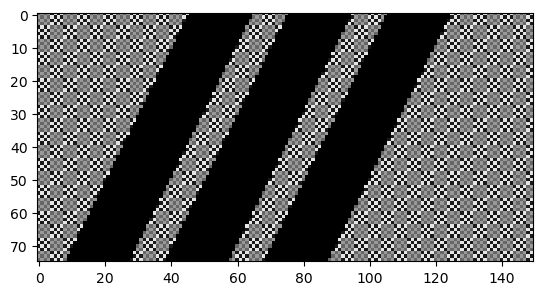

FileNotFoundError: [Errno 2] No such file or directory: 'scenes/checkerboard.png'

In [6]:
checkerboard = torch.rand(3, 75, 150)
for x in range(0, checkerboard.size()[1]):
    for y in range(0, checkerboard.size()[2]):
        if (x + y) % 2 == 0:
            checkerboard[:, x, y] = 0.1
            if (int(x/4) + int(y/4)) % 2 == 0:
                checkerboard[:, x, y] = 0.4
        else:
            if (int(x/4) + int(y/4)) % 2 == 0:
                checkerboard[:, x, y] = 0.6
            else:
                checkerboard[:, x, y] = 0.9

        if x * 0.5  + y > 75 and x * 0.5 + y < 95:
            checkerboard[:, x, y] = 0.0

        if x * 0.5  + y > 75+30 and x * 0.5 + y < 95+30:
            checkerboard[:, x, y] = 0.0
        if x * 0.5  + y > 75-30 and x * 0.5 + y < 95-30:
            checkerboard[:, x, y] = 0.0

show(checkerboard)
save_image(checkerboard, "scenes/checkerboard.png")

/tmp/ipykernel_969458/4283507136.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("scenes/"+scene+".jpg")
/tmp/ipykernel_969458/4283507136.py:10: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((width, height), Image.LANCZOS)


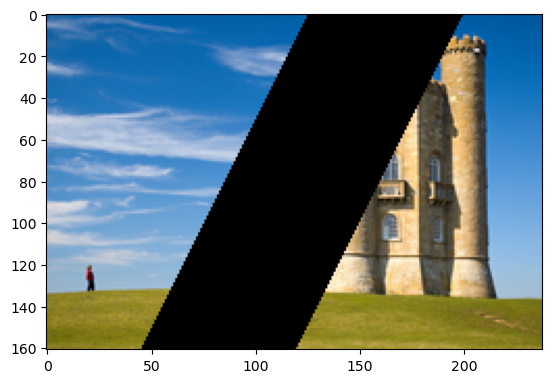

In [ ]:
scene = "tower"
DOWNSCALE_FACTOR = 6
try:
    img = imageio.imread("scenes/"+scene+".jpg")
except:
    img = imageio.imread("scenes/"+scene+".png")
height = img.shape[0] // DOWNSCALE_FACTOR
width = img.shape[1] // DOWNSCALE_FACTOR
img = Image.fromarray(img).convert("RGBA")
img = img.resize((width, height), Image.LANCZOS)
img = torch.tensor(np.array(img)).transpose(1,2).transpose(1,0).float()[0:3] / 255.0

#pure noise
#img = torch.rand_like(torch.tensor(img))
#img[:, :, 50:186] *= 0.0
#img[:, :, 50:100] *= 0.0

for x in range(0, img.size()[1]):
    break
    for y in range(0, img.size()[2]):
        if y > 35 and (x*0.2 - y) > -52+15 or y <= 35 and y > 25:
            img[:,x,y] = 0.0

        #if y < 120+100 and -(x*0.2 - y) > 70+100:
        #    img[:,x,y] = 0.0

for x in range(0, img.size()[1]):
    for y in range(0, img.size()[2]):
        if x * 0.5  + y > 125 and x * 0.5 + y < 200:
            img[:, x, y] = 0.0
            
show(img)
save_image(img, "scenes/tower_shearing.png")

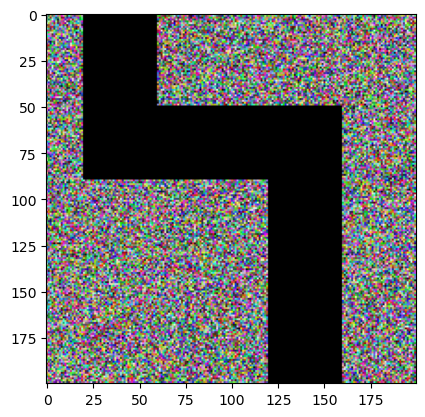

In [11]:
test = torch.rand(3, 200, 200)
#reduce by 1/5th: 0.8, i.e. 80%
test[:, 20:60, 0:50] *= 0
test[:, (20):(60+100), 50:90] *= 0
test[:, 120:160, 90:] *= 0
show(test.transpose(1,2))
save_image(test.transpose(1,2), "../scenes/v2ugly_deformation.png")